In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import string
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from modules.env import MazeVisualization
from utils.skeletonize import skeletonize_env, draw_graph_with_curved_edges, draw_scatter_plot_skeleton
import seaborn as sns
from modules.base import SRMB
import matplotlib
from matplotlib import cm
from utils.plot import plot_transition_graph
from utils.topology import load_topology_graphs, classify_isomorphic_pairs

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['ps.fonttype'] = 42
rcParams['font.sans-serif'] = ['Arial']  # 예시: Arial로 설정
rcParams['font.family'] = 'sans-serif'

sns.set_style(
    'ticks',
    rc={
        'xtick.direction': 'in',  # x축 tick을 안쪽으로
        'ytick.direction': 'in',  # y축 tick을 안쪽으로
    }
)
rcParams["figure.dpi"] = 600
# Set the font to Arial
big_font = 20
mid_font = 15
small_font = 12

indicator_font = big_font
legend_font = mid_font
title_font = mid_font
axis_font = mid_font
tick_font = small_font



subplot_scale_factor = 3

indicator_x_loc = -0.1
indicator_y_loc = 1.15

node_size = 300
edge_width = 4


In [2]:
junction_color = "#416788"
deadend_color = "#646464"
edge_color = "#E1DAD2"

palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

/tmp/ipykernel_400504/838875619.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("jet").reversed()


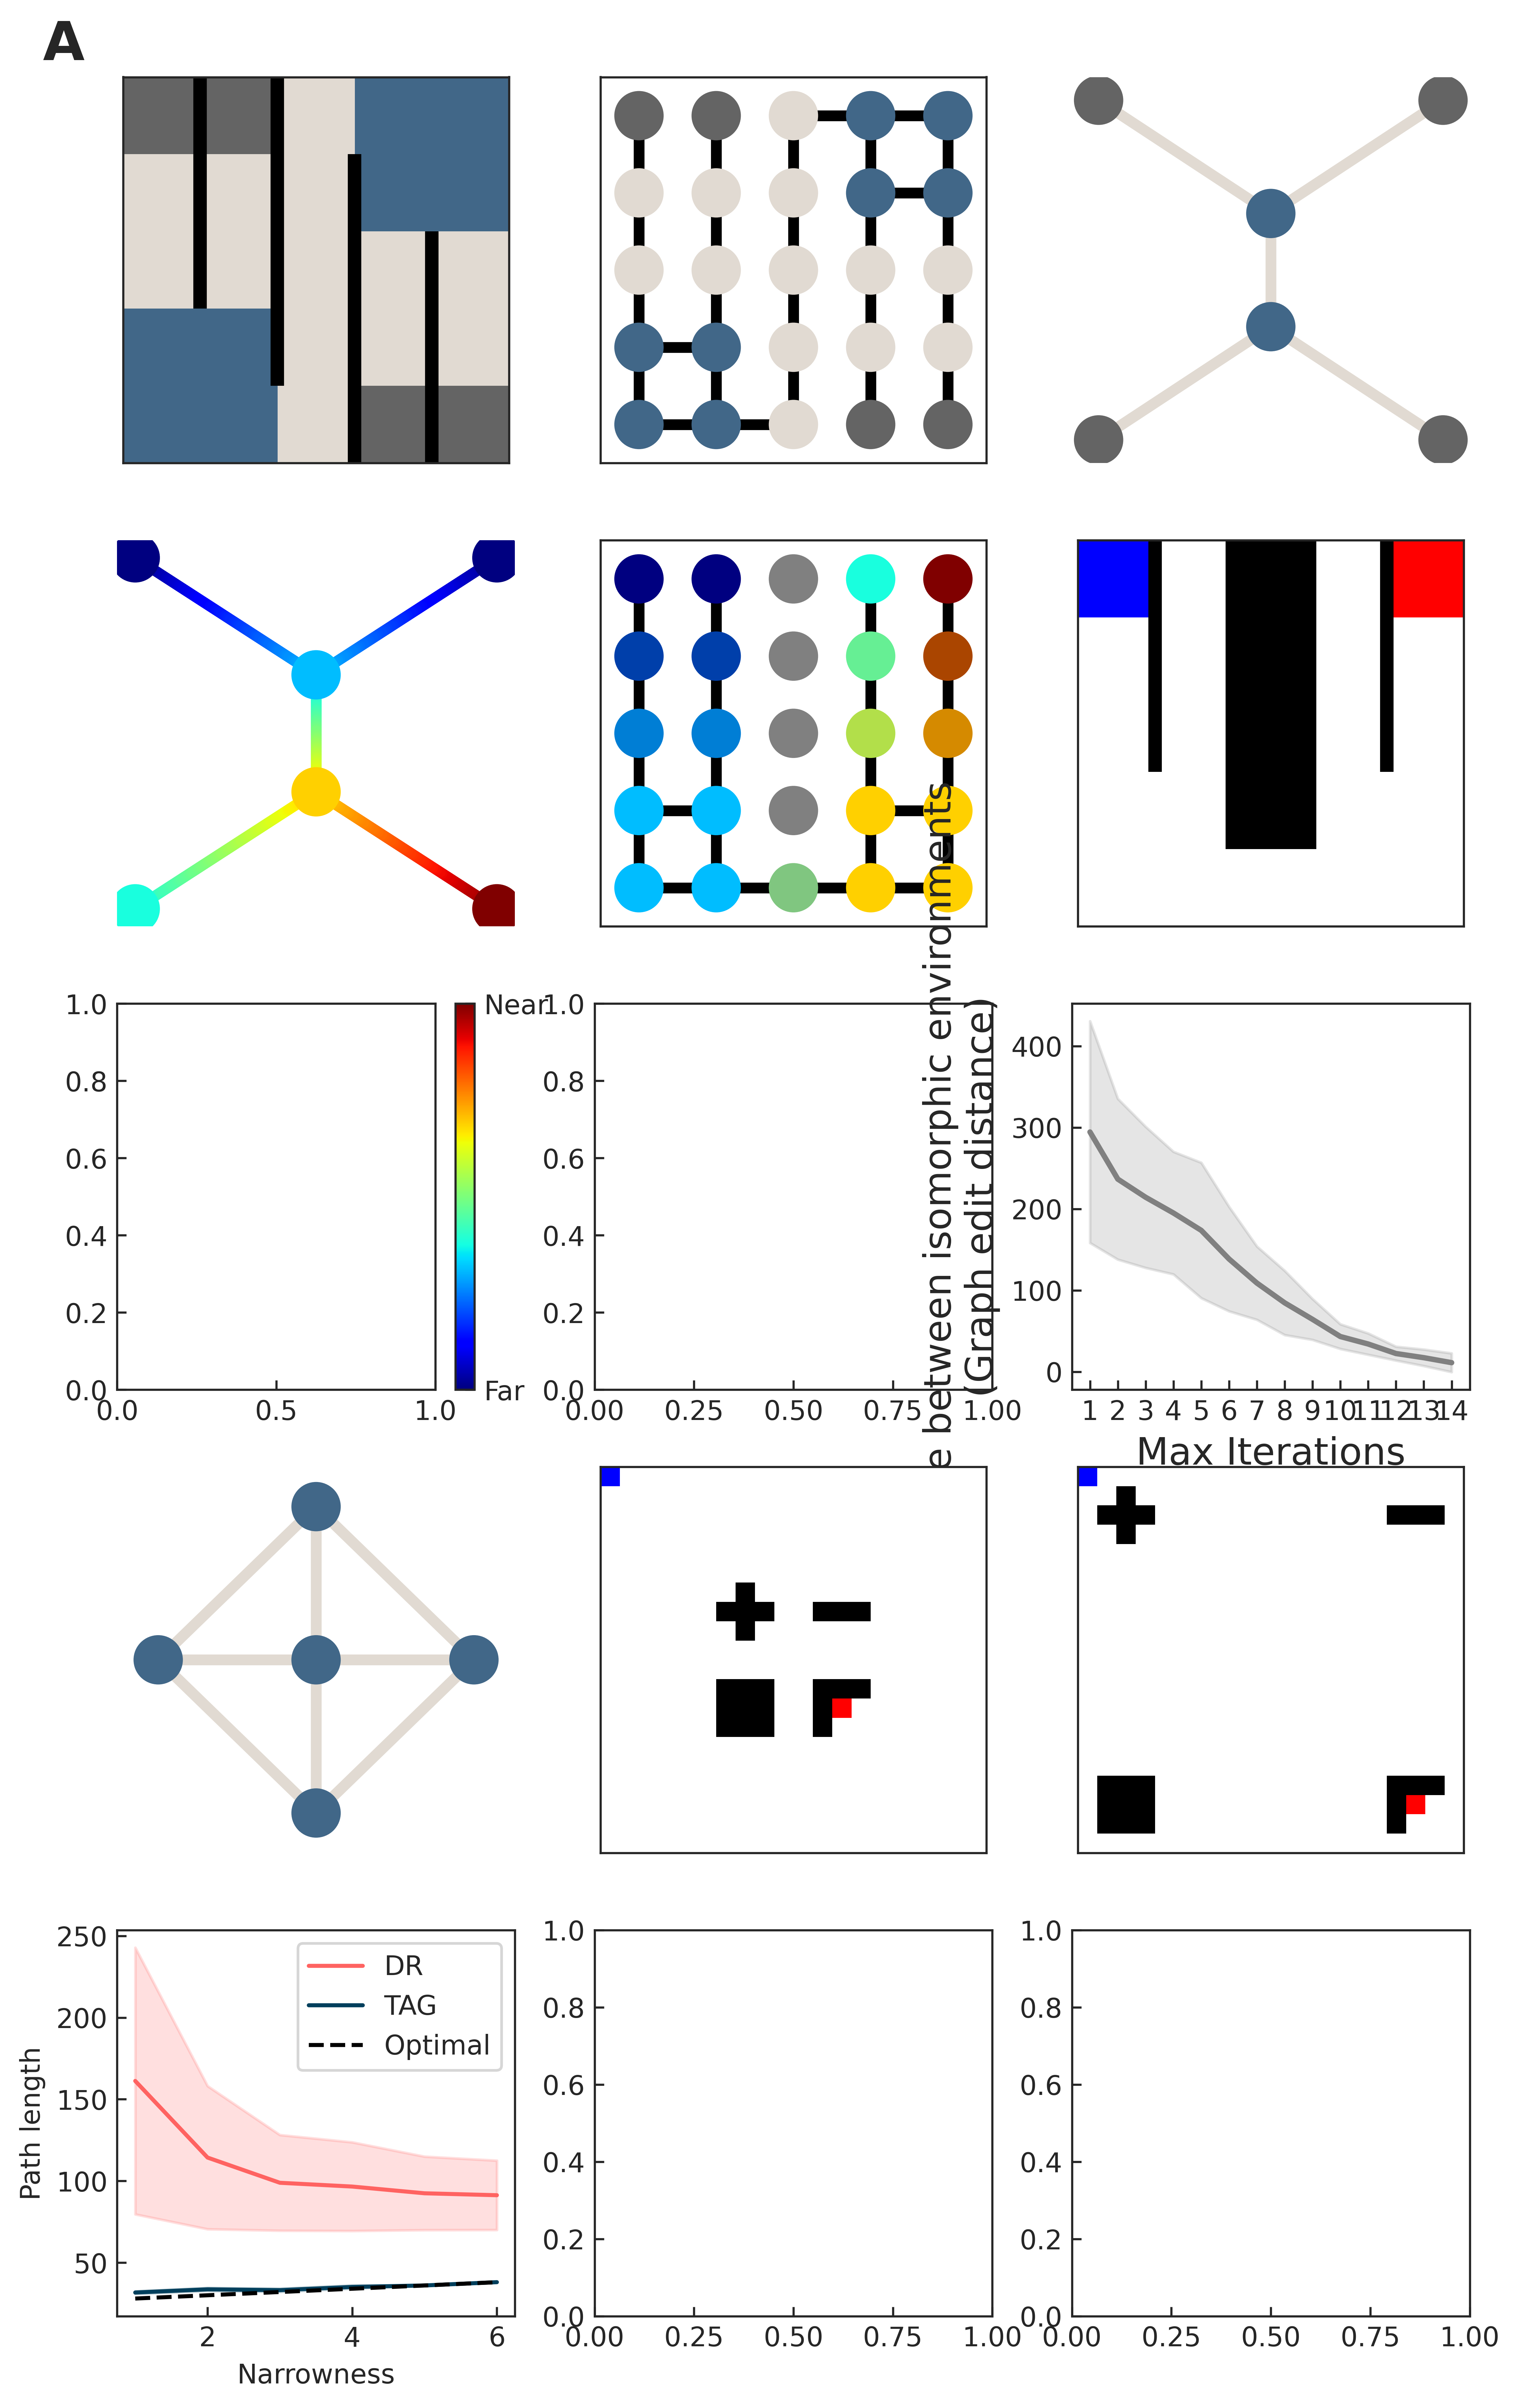

In [3]:
from more_itertools import consecutive_groups


num_row, num_column = 5, 3
fig, axs = plt.subplots(num_row, num_column, figsize=(num_column * 3, num_row * 3))
for ax in [axs.flat[j] for j in [0, 1, 4, 5]]:
    ax.set_aspect('equal')



# A

env1 = MazeVisualization(5, 5)
walls1 = [
    (0, 1), (1, 2), (5, 6), (6, 7), (7, 8), (10, 11), (11, 12), (12, 13), (13, 14),
    (16, 17), (17, 18), (18, 19), (22, 23), (23, 24)
]
env1.update_map(walls=walls1)

junction_states = [3, 4, 8, 9, 15, 16, 20, 21]
deadend_states = [0, 1, 23, 24]
edge_states = np.setdiff1d(np.arange(25), np.concatenate([junction_states, deadend_states]))

env1.visualize(ax=axs[0, 0], vertex_states=junction_states, deadend_states=deadend_states, edge_states=edge_states, junction_color=junction_color, deadend_color=deadend_color, edge_color=edge_color) 
axs[0, 0].text(indicator_x_loc, indicator_y_loc, 'A', transform=axs[0, 0].transAxes, fontsize=indicator_font, fontweight='bold', va='top', ha='right')


env2 = MazeVisualization(5, 5)
walls2 = [
    (0, 1), (1, 2), (5, 6), (6, 7), (7, 8), (10, 11), (11, 12), (12, 13), (13, 14),
    (16, 17), (17, 18), (8, 9), (2, 3), (3, 4)
]
blocks = [2, 7, 12, 17]
env2.update_map(blocks=blocks, walls=walls2)
'''env2.visualize(ax=axs[0, 1], vertex_states=[15, 16, 20, 21, 18, 19, 23, 24], deadend_states=[0, 1, 3, 4], edge_states=[5, 10, 6, 11, 8, 13, 9, 14, 22], junction_color=junction_color, deadend_color=deadend_color, edge_color=edge_color)'''
env2.set_start_goal_states(0, 4)

vertex_nodes, deadend_nodes, edge_nodes, simplified_G, image_original, skeleton, vertex_corresp, deadend_corresp, edge_corresp, edge_dict, original_G, closest_skeleton_indices, = skeletonize_env(env1)

sr = SRMB(5, 5)
sr.update_map_structure(blocks=env1.blocks, walls=env1.walls)
plot_transition_graph(
    sr.transition_matrix, junction_states, deadend_states, edge_states, junction_color, deadend_color, edge_color, num_columns=5, node_size=node_size, edge_width=edge_width, ax=axs[0, 1]
)

pos = {
    (0, 0): (0, 6),
    (0, 1): (4, 6),
    (3, 0): (2, 4),
    (1, 3): (2, 2),
    (4, 3): (0, 0),
    (4, 4): (4, 0)
}

draw_graph_with_curved_edges(
    simplified_G, "", save=False, ax=axs[0, 2], pos=pos, node_size=node_size, edge_width=edge_width,
)

pos = {
    (0, 0): (0, 6),
    (0, 1): (4, 6),
    (3, 0): (2, 4),
    (3, 3): (2, 2),
    (0, 3): (0, 0),
    (0, 4): (4, 0)
}

vertex_nodes, deadend_nodes, edge_nodes, simplified_G, image_original, skeleton, vertex_corresp, deadend_corresp, edge_corresp, edge_dict, original_G, closest_skeleton_indices, = skeletonize_env(env2)

_, norm_dist = draw_graph_with_curved_edges(
    simplified_G, "", save=False, ax=axs[1, 0], pos=pos, use_distance_color=True, n_samples=100, source_node=(0, 4), node_size=node_size, edge_width=edge_width,
)
cmap = cm.get_cmap("jet").reversed()

seed_to_color = {
    0: cmap(norm_dist[(0, 0)]),
    1: cmap(norm_dist[(0, 1)]),
    3: cmap(norm_dist[(0, 3)]),
    4: cmap(norm_dist[(0, 4)]),
    15: cmap(norm_dist[(3, 0)]),
    16: cmap(norm_dist[(3, 0)]),
    20: cmap(norm_dist[(3, 0)]),
    21: cmap(norm_dist[(3, 0)]),
    18: cmap(norm_dist[(3, 3)]),
    19: cmap(norm_dist[(3, 3)]),
    23: cmap(norm_dist[(3, 3)]),
    24: cmap(norm_dist[(3, 3)]),
}

sr = SRMB(5, 5)
sr.update_map_structure(blocks=env2.blocks, walls=env2.walls)
plot_transition_graph(
    sr.transition_matrix, junction_states, deadend_states, edge_states, junction_color, deadend_color, edge_color, num_columns=5, node_size=node_size, edge_width=edge_width, ax=axs[1, 1], seed_to_color=seed_to_color
)
import matplotlib as mpl
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='jet'), ax=axs[2, 0]); cb.set_ticks([0, 1]); cb.set_ticklabels(['Far', 'Near'])
env2.visualize(ax=axs[1, 2], subgoals=[])





def generate_pairs(num_graphs: int) -> list:
    """
    Generate all unique index pairs (i, j) for 0 <= i < j < num_graphs,
    corresponding to the upper triangular part of a distance matrix.
    """
    return [(i, j) for i in range(num_graphs) for j in range(i + 1, num_graphs)]


base = "data/skeletonize/skeleton_graph/train"
topo_dict = load_topology_graphs(base)
N = len(topo_dict)
pairs = generate_pairs(N)
iso, non_iso = classify_isomorphic_pairs(pairs, topo_dict)

filtered_iso = [
    (k1, k2)
    for (k1, k2) in iso
    if topo_dict[(k1 // 100 + 1, k1 % 100 + 1)].number_of_nodes() > 1 and topo_dict[(k2 // 100 + 1, k2 % 100 + 1)].number_of_nodes() > 1
]

# Load the parametric GW distance tensor (shape: 1000, 1000, 20)
gw_dist_graph_parametric_tensor = np.load(
    "data/topology_encoding/ge_dist_graph_relparam_tensor.npy"
)

# Extract distances for isomorphic pairs for each max_iter
iso_distances_by_iter = []
for iter_idx in range(14):  # 0-19 representing max_iter 1-20
    iso_iter_distances = [
        gw_dist_graph_parametric_tensor[pair[0], pair[1], iter_idx]
        for pair in filtered_iso
    ]
    # Filter out any invalid values
    iso_iter_distances = [d for d in iso_iter_distances if not np.isnan(d) and d >= 0]
    iso_distances_by_iter.append(iso_iter_distances)

# Calculate mean and std for each max_iter
iso_means = [np.mean(distances) for distances in iso_distances_by_iter]
iso_stds = [np.std(distances) for distances in iso_distances_by_iter]


x = np.arange(1, 15)  # max_iter values 1-20
axs[2, 2].plot(
    x, iso_means, color="#808080", linewidth=2
)
axs[2, 2].fill_between(
    x,
    np.array(iso_means) - np.array(iso_stds),
    np.array(iso_means) + np.array(iso_stds),
    color="#808080",
    alpha=0.2,
)

# Add labels and formatting
axs[2, 2].set_xlabel("Max Iterations", fontsize=14)
axs[2, 2].set_ylabel("Distance between isomorphic environments\n(Graph edit distance)", fontsize=14)
axs[2, 2].set_xticks(x)

from tests.policy_decoding import set_envs_blocks

env_list = set_envs_blocks()[0]

env_compos_near = MazeVisualization(20, 20)
env_compos_near.update_map(blocks=env_list[0].blocks, walls=env_list[0].walls)
env_compos_near.set_start_goal_states(env_list[0].start, env_list[0].goal)
env_compos_near.visualize(ax=axs[3, 1], display=True, puddle=False, trajectory=False, no_startgoal=False)

env_compos_far = MazeVisualization(20, 20)
env_compos_far.update_map(blocks=env_list[5].blocks, walls=env_list[5].walls)
env_compos_far.set_start_goal_states(env_list[5].start, env_list[5].goal)
env_compos_far.visualize(ax=axs[3, 2], display=True, puddle=False, trajectory=False, no_startgoal=False)


(
    vertex_nodes,
    deadend_nodes,
    edge_nodes,
    simplified_G,
    image,
    skeleton,
    vertex_corresp,
    deadend_corresp,
    edge_corresp,
    edge_dict,
    original_G,
    closest_skeleton_indices,
) = skeletonize_env(env_compos_far, with_mapping=True)

pos = {
    (9, 9): (2, 2),
    (9, 13): (2, 4),
    (14, 9) : (0, 2),
    (5, 9): (4, 2),
    (9, 5): (2, 0),
}

draw_graph_with_curved_edges(
    simplified_G, '', rad=0.2, self_loop_rad=1, save=False, pos=pos, ax=axs[3, 0], set_margin=True, node_size=node_size, edge_width=edge_width,
)


timesteps_dr_list = []
timesteps_optimal_list = []
timesteps_tag_list = []
deterministic_str = "stochastic"
for trial in range(6):
    # z 계열 불러와서 리스트에 추가
    timesteps_optimal = np.load(f'data/policy_decoding/timesteps_optimal_{trial}_0_mean_length.npy')
    timesteps_dr  = np.load(f'data/policy_decoding/timesteps_dr_{trial}_0_mean_length.npy')
    timesteps_tag      = np.load(f'data/policy_decoding/timesteps_tag_{trial}_0_mean_length.npy')

    timesteps_optimal_list.append(timesteps_optimal)
    timesteps_dr_list.append(timesteps_dr)
    timesteps_tag_list.append(timesteps_tag)


# Compute means and standard deviations for each trial
means_dr = [np.mean(arr) for arr in timesteps_dr_list]
stds_dr = [np.std(arr) for arr in timesteps_dr_list]

means_tag = [np.mean(arr) for arr in timesteps_tag_list]
stds_tag = [np.std(arr) for arr in timesteps_tag_list]

means_optimal = [np.mean(arr) for arr in timesteps_optimal_list]
stds_optimal = [np.std(arr) for arr in timesteps_optimal_list]



# Define stylish color palette
color_dr = palette[3]   # blue
color_tag = palette[0]      # orange



trials = np.arange(1, 7)  # Assuming trials are from 1 to 6
# Plot for "dr"
axs[4, 0].plot(trials, means_dr, label='DR', color=color_dr)
axs[4, 0].fill_between(
    trials,
    [m - s for m, s in zip(means_dr, stds_dr)],
    [m + s for m, s in zip(means_dr, stds_dr)],
    color=color_dr,
    alpha=0.2
)

# Plot for "TAG"
axs[4, 0].plot(trials, means_tag, label='TAG', color=color_tag)
axs[4, 0].fill_between(
    trials,
    [m - s for m, s in zip(means_tag, stds_tag)],
    [m + s for m, s in zip(means_tag, stds_tag)],
    color=color_tag,
    alpha=0.2
)

# Plot for "optimal"
axs[4, 0].plot(trials, means_optimal, label='Optimal', color='black', linestyle='--')

axs[4, 0].set_xlabel('Narrowness')
axs[4, 0].set_ylabel('Path length')

axs[4, 0].legend()

plt.savefig('./figure/figure_5.svg', bbox_inches='tight', transparent=True)
plt.show()